In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Transition matrices
gold_matrix = np.array([[1/4, 1/4, 1/2], [1/4, 1/2, 1/4], [1/2, 1/4, 1/4]])
e = np.linalg.eig(gold_matrix)

bc_matrix = np.array([[0.5, 0.45, 0.25], [0.25, 0.1, 0.25], [0.25, 0.45, 0.5]])
e2 = np.linalg.eig(bc_matrix)

ModuleNotFoundError: No module named 'matplotlib'

# Pre-Processing

### Use pandas to load data into notebook

In [ ]:
bc_df = pd.read_csv('BCHAIN-MKPRU.csv')

bc_df.head(10)
len(bc_df)

1826

In [ ]:
gold_df = pd.read_csv('LBMA-GOLD.csv')
gold_df.head(10)
len(gold_df)

1265

Total increasing days: 989
Total decreasing days: 837
Increasing:Decreasing Ratio: 0.0006470980042686223


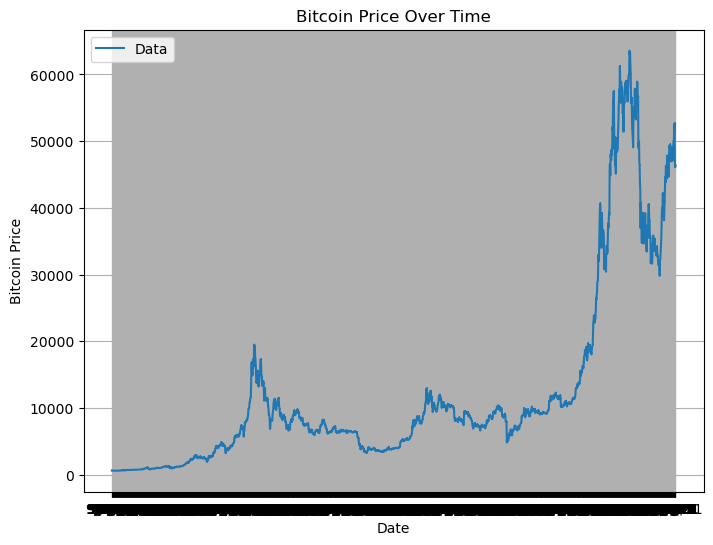

In [ ]:
prev_val = bc_df.iloc[0]['Value']
up_days = 0
down_days = 0
total_days = 0
prices = []
days = []
for index, row in bc_df.iterrows():
    curr_val = bc_df.iloc[index]['Value']
    prices.append(curr_val)
    days.append(bc_df.iloc[index]['Date'])
    if curr_val > prev_val:
        up_days += 1
    else:
        down_days += 1
    total_days+=1
    prev_val = curr_val

print(f"Total increasing days: {up_days}")
print(f"Total decreasing days: {down_days}")
print(f"Increasing:Decreasing Ratio: {(up_days / down_days) / total_days}")

plt.figure(figsize=(8, 6))
plt.plot(days, prices, marker=',', label='Data')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.grid(True)

plt.show()

Total increasing days: 642
Total decreasing days: 623
Increasing:Decreasing Ratio: 0.000814622602605016
Total increasing days: 642
Total decreasing days: 623
Increasing:Decreasing Ratio: 0.000814622602605016


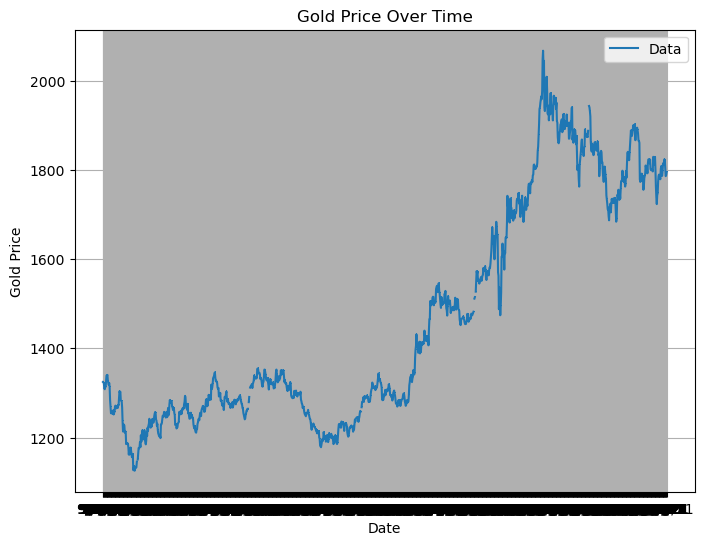

In [ ]:
prev_val =gold_df.iloc[0]['USD (PM)']
up_days = 0
down_days = 0
total_days = 0
prices = []
days = []
for index, row in gold_df.iterrows():
    curr_val = gold_df.iloc[index]['USD (PM)']
    prices.append(curr_val)
    days.append(gold_df.iloc[index]['Date'])
    if curr_val > prev_val:
        up_days += 1
    else:
        down_days += 1
    total_days+=1
    prev_val = curr_val

print(f"Total increasing days: {up_days}")
print(f"Total decreasing days: {down_days}")
print(f"Increasing:Decreasing Ratio: {(up_days / down_days) / total_days}")

print(f"Total increasing days: {up_days}")
print(f"Total decreasing days: {down_days}")
print(f"Increasing:Decreasing Ratio: {(up_days / down_days) / total_days}")

plt.figure(figsize=(8, 6))
plt.plot(days, prices, marker=',', label='Data')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Over Time')
plt.legend()
plt.grid(True)

plt.show()



## Simple Model
First, lets try to create an incredibly simple trading model. In this model, we will determine if a given vessel is in a heightened state, unheigtened state, or level state and make our trading decision based purely off of this information. Let us only consider trading bitcoin here, so we do not have to worry about (not) trading on weekends, and also neglect the cost to buy and sell bitcoin. 

In [ ]:
# Starting price of bitcoin
starting_bc_price = bc_df.iloc[0]['Value']
# Starting price of gold
starting_gold_price = gold_df.iloc[0]['USD (PM)']
# Represents how much of each vessel we own at the beginning
alloc = np.array([1000, 0, 0.0])
# How much a price must change to trigger buy or sell
threshold = 100
# How much money we move in and out of a vessel when buying or selling
unit = 0.05*alloc[0]

prev_price = starting_bc_price
# For every possible day to trade bitcoin
for index, row in bc_df.iterrows():
    # Get the day's price
    curr_price = bc_df.iloc[index]['Value']
    # Calculate our unit based on how much bitcoin we have 
    unit = 0.05*alloc[0]  
    
    # If bitcoin is in an upswing, sell
    if(curr_price - threshold >= prev_price):
        # Ensure we have enough bitcoin to sell
        num_bitcoin =  enter_cash / curr_price 
        if(alloc[2]-num_bitcoin >= 0):
            # Cash moving out of bitcoin
            exit_cash = unit
            print(f"Selling {num_bitcoin} bitcoin for {exit_cash} dollars on day {index}")
            alloc[2] -= num_bitcoin
            alloc[0] +=  exit_cash * 0.98
    # If bitcoin is in a downswing
    elif(curr_price + threshold <= prev_price):
        # Money needed to buy bitcoin
        enter_cash = unit
        # Ensure we have enough money to buy bitcoin
        if(alloc[0] - enter_cash > 0):
            num_bitcoin =  enter_cash / curr_price
            print(alloc[0], alloc[2])
            print(f"Buying {num_bitcoin} amount of bitcoin with {enter_cash} for {curr_price} dolallars on day {index}")
            alloc[2] +=  num_bitcoin
            alloc[0] -=  enter_cash * 1.02
            print(alloc[0], alloc[2])
    else:
        continue
    
    prev_price = curr_price
    
print(f"Cash: {alloc[0]}")
print(f"Gold: {alloc[1]}")
print(f"Bitcoin: {alloc[2]}")
total_money = alloc[0] + alloc[1]*gold_df.iloc[-1]['USD (PM)'] + alloc[2]*bc_df.iloc[-1]['Value']
print(f"Total Money: {total_money}")
print(f"Total Gains {total_money-1000}")
print(f"Returns: {100*((total_money -1000)/ (1000))}%")
    

1000.0 0.0
Buying 0.050267928056541365 amount of bitcoin with 50.0 for 994.67 dolallars on day 116
949.0 0.050267928056541365
949.0 0.050267928056541365
Buying 0.06042892437788136 amount of bitcoin with 47.45 for 785.22 dolallars on day 122
900.601 0.11069685243442273
Selling 0.05249822977518145 bitcoin for 45.03005 dollars on day 128
Selling 0.04683981769488869 bitcoin for 47.23652245 dollars on day 145
991.022241001 0.011358804964352598
Buying 0.042812682646469445 amount of bitcoin with 49.55111205005 for 1157.3933 dolallars on day 178
940.480106709949 0.05417148761082204
Selling 0.039407608420473327 bitcoin for 47.024005335497456 dollars on day 185
986.5636319387365 0.014763879190348717
Buying 0.045206609645479456 amount of bitcoin with 49.32818159693683 for 1091.171888 dolallars on day 187
936.2488867098609 0.05997048883582817
936.2488867098609 0.05997048883582817
Buying 0.0491607365796634 amount of bitcoin with 46.81244433549305 for 952.2323625 dolallars on day 188
888.50019348765

## Threshold effects

In [ ]:
threshold = 5
returns = []
thresholds = []

while threshold < 100: 
    # Starting price of bitcoin
    starting_bc_price = bc_df.iloc[0]['Value']
    # Starting price of gold
    starting_gold_price = gold_df.iloc[0]['USD (PM)']
    # Represents how much of each vessel we own at the beginning
    alloc = np.array([1000, 0, 0.0])
    # How much money we move in and out of a vessel when buying or selling
    unit = 0.05*alloc[0]
    prev_price = starting_bc_price
    # For every possible day to trade bitcoin
    for index, row in bc_df.iterrows():
        # Get the day's price
        curr_price = bc_df.iloc[index]['Value']
        # Calculate our unit based on how much bitcoin we have 
        unit = 0.05*alloc[0]  
        
        # If bitcoin is in an upswing, sell
        if(curr_price - threshold >= prev_price):
            # Ensure we have enough bitcoin to sell
            num_bitcoin =  enter_cash / curr_price 
            if(alloc[2]-num_bitcoin >= 0):
                # Cash moving out of bitcoin
                exit_cash = unit
                #print(f"Selling {num_bitcoin} bitcoin for {exit_cash} dollars on day {index}")
                alloc[2] -= num_bitcoin
                alloc[0] +=  exit_cash * 0.98
        # If bitcoin is in a downswing
        elif(curr_price + threshold <= prev_price):
            # Money needed to buy bitcoin
            enter_cash = unit
            # Ensure we have enough money to buy bitcoin
            if(alloc[0] - enter_cash > 0):
                num_bitcoin =  enter_cash / curr_price
                #print(alloc[0], alloc[2])
                #print(f"Buying {num_bitcoin} amount of bitcoin with {enter_cash} for {curr_price} dolallars on day {index}")
                alloc[2] +=  num_bitcoin
                alloc[0] -=  enter_cash * 1.02
                #print(alloc[0], alloc[2])
        else:
            continue
        
        prev_price = curr_price
    
    total_money = alloc[0] + alloc[1]*gold_df.iloc[-1]['USD (PM)'] + alloc[2]*bc_df.iloc[-1]['Value']
    gain = 100*((total_money -1000)/ (1000))
    returns.append(gain)
    print(threshold)
    thresholds.append(threshold)
    threshold += 0.5
    
    

5
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0
41.5
42.0
42.5
43.0
43.5
44.0
44.5
45.0
45.5
46.0
46.5
47.0
47.5
48.0
48.5
49.0
49.5
50.0
50.5
51.0
51.5
52.0
52.5
53.0
53.5
54.0
54.5
55.0
55.5
56.0
56.5
57.0
57.5
58.0
58.5
59.0
59.5
60.0
60.5
61.0
61.5
62.0
62.5
63.0
63.5
64.0
64.5
65.0
65.5
66.0
66.5
67.0
67.5
68.0
68.5
69.0
69.5
70.0
70.5
71.0
71.5
72.0
72.5
73.0
73.5
74.0
74.5
75.0
75.5
76.0
76.5
77.0
77.5
78.0
78.5
79.0
79.5
80.0
80.5
81.0
81.5
82.0
82.5
83.0
83.5
84.0
84.5
85.0
85.5
86.0
86.5
87.0
87.5
88.0
88.5
89.0
89.5
90.0
90.5
91.0
91.5
92.0
92.5
93.0
93.5
94.0
94.5
95.0
95.5
96.0
96.5
97.0
97.5
98.0
98.5
99.0
99.5


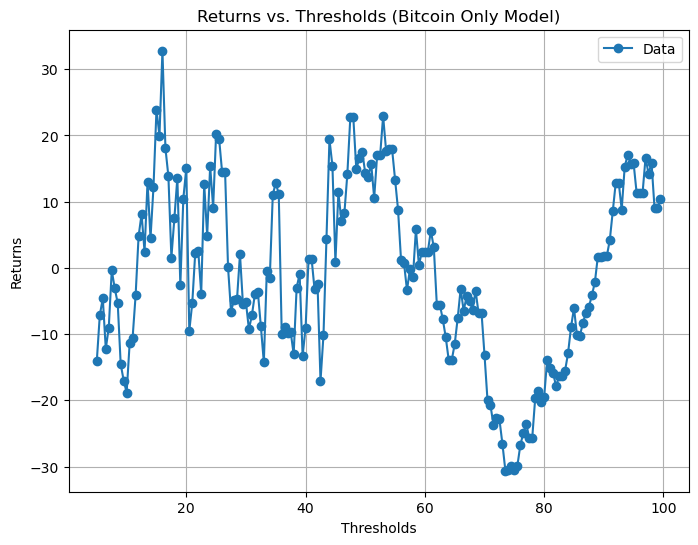

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
plt.plot(thresholds, returns, marker='o', label='Data')

# Add labels, title, and legend
plt.xlabel('Thresholds')
plt.ylabel('Returns')
plt.title('Returns vs. Thresholds (Bitcoin Only Model)')
plt.legend()
plt.grid(True)

plt.show()

# Intuition Strategy with Decision Matrix

In [ ]:
# Strategy: intuition with decision matrix

# Starting price of bitcoin
starting_bc_price = bc_df.iloc[0]['Value']
# Starting price of gold
starting_gold_price = gold_df.iloc[0]['USD (PM)']

# Allocation vector is of the form [cash in dollars, gold units, bitcoin units]
alloc = np.array([200, 400 / starting_gold_price, 400 / starting_bc_price])


n = 5 * 365 # number of days
gold_index, bc_index = 0, 0
prev_gold = starting_gold_price
prev_bc = starting_bc_price
threshold = 10

# trading units
bc_tu = alloc[0] * 0.1  # weekend bc trading unit

# in DOLLARS
bu = alloc[0] * 0.1  # overall trading unit for weekdays
gold_bu = 0.6 * bu
bc_bu = 0.4 * bu

# in UNITS
gold_su = alloc[1] * 0.06
bc_su = alloc[2] * 0.04

while gold_index <= n and bc_index <= n:
    #print(gold_index)
    #print(bc_index)
    
    bc_row = bc_df.iloc[bc_index]
    gold_row = gold_df.iloc[gold_index]
    
    # print(f"gold date: {gold_row['Date']}")
    # print(f"gold date: {bc_row['Date']}")
    # print(gold_row['Date'] == bc_row['Date'])

    # If weekend
    if bc_row['Date'] != gold_row['Date']:
        #print("Weekend")
        bc_value = bc_row['Value']

        if prev_bc - bc_value > threshold and alloc[0] - bc_tu >= 0:
            alloc[2] += bc_tu * (1 / bc_value)  # buy units of bc
            alloc[0] -= bc_tu
        elif prev_bc < bc_value - threshold and alloc[2] - bc_tu >= 0:
            alloc[2] -= bc_tu * (1 / bc_value)  # sell units of bc
            alloc[0] += bc_tu
        
        prev_bc = bc_value
        bc_index += 1
        bc_row = bc_df.iloc[bc_index]
        
        
    # weekday
    elif bc_row['Date'] == gold_row['Date']:
        #print("Weekday")
        bc_value = bc_row['Value']
        gold_value = gold_row['USD (PM)']

        # BC decreasing
        if prev_bc - bc_value > threshold:
            # gold dec
            if prev_gold - gold_value > threshold and alloc[0] >= bu:
                alloc[0] -= bu
                alloc[1] += gold_bu * (1 / gold_value)
                alloc[2] += bc_bu * (1 / bc_value)
            # gold stable
            elif abs(prev_gold - gold_value) < threshold and alloc[0] >= bc_bu:
                alloc[0] -= bc_bu
                alloc[2] += bc_bu * (1 / bc_value)
            # gold inc
            elif gold_value - prev_gold > threshold and gold_su * gold_value + alloc[0] >= bc_bu:
                alloc[1] -= gold_su
                alloc[0] += gold_su * gold_value
                alloc[0] -= bc_bu * (1 / bc_value)
                alloc[2] += bc_bu
                
        # PLS DOUBLE CHECK
        # BC increasing
        if prev_bc < bc_value - threshold:
            # gold dec
            if prev_gold - gold_value > threshold and bc_su * bc_value + alloc[0] >= gold_bu: # buy gold with bc
                alloc[2] -= bc_su
                alloc[0] += bc_su * bc_value
                alloc[0] -= gold_bu * (1 / gold_value)
                alloc[1] += gold_bu
            # gold stable
            elif abs(prev_gold - gold_value) < threshold: # bc to cash
                alloc[2] -= bc_su
                alloc[0] += bc_su * bc_value
            # gold inc
            elif gold_value - prev_gold > threshold: # sell 60/40
                alloc[1] -= gold_su
                alloc[2] -= bc_su
                alloc[0] += bc_su * bc_value + gold_su + gold_value
                
        # PLS DOUBLE CHECK
        # BC stable
        if abs(bc_value - prev_bc) < threshold:
            # gold dec
            if prev_gold - gold_value > threshold and alloc[0] >= gold_bu: # buy gold with cash
                alloc[0] -= gold_bu
                alloc[1] += gold_bu * (1 / gold_value)
            # gold stable
            # elif abs(prev_gold - gold_value) < threshold: # Do Nothing
            #     continue
            # gold inc
            elif gold_value - prev_gold > threshold: # gold to cash
                alloc[1] -= gold_su
                alloc[0] += gold_su * gold_value
    # get current value from excel sheets
    # compare to previous values, if change is greater than move threshold, check states
        bc_index += 1
        gold_index += 1
    

print(f"Cash: {alloc[0]}")
print(f"Gold: {alloc[1]}")
print(f"Bitcoin: {alloc[2]}")
total_money = alloc[0] + alloc[1]*gold_df.iloc[-1]['USD (PM)'] + alloc[2]*bc_df.iloc[-1]['Value']
print(f"Total Money: {total_money}")
print(f"Total Gains {total_money-1000}")
print(f"Returns: {100*((total_money -1000)/ (1000))}%")


    
    # States:
    # Make move matrix    

Cash: 758566.3789930136
Gold: 3519.718435866611
Bitcoin: 2168.785037625901
Total Money: 107638774.17031299
Total Gains 107637774.17031299
Returns: 10763777.4170313%


In [ ]:
import numpy as np
import pandas as pd

# Assuming bc_df and gold_df are already loaded as pandas DataFrames
# Replace the following placeholders with actual data loading steps:
# bc_df = pd.read_csv('bitcoin_data.csv')
# gold_df = pd.read_csv('gold_data.csv')

# Starting price of bitcoin
starting_bc_price = bc_df.iloc[0]['Value']
# Starting price of gold
starting_gold_price = gold_df.iloc[0]['USD (PM)']

transactions = 0
money_lost = 0

# Allocation vector is of the form [cash in dollars, gold units, bitcoin units]
alloc = np.array([1000, 0, 0])

n = 5 * 365  # number of days
gold_index, bc_index = 0, 0
prev_gold = starting_gold_price
prev_bc = starting_bc_price
threshold = 10

# Trading units
bc_tu = alloc[0] * 0.1  # weekend bitcoin trading unit (in dollars)

# In dollars
bu = alloc[0] * 0.1  # overall trading unit for weekdays
gold_bu = 0.6 * bu
bc_bu = 0.4 * bu

# In units
gold_su = alloc[1] * 0.06
bc_su = alloc[2] * 0.04

while gold_index < len(gold_df) and bc_index < len(bc_df):
    bc_row = bc_df.iloc[bc_index]
    gold_row = gold_df.iloc[gold_index]

    # Weekend: Bitcoin data available, but no gold data
    if bc_row['Date'] != gold_row['Date']:
        bc_value = bc_row['Value']

        if prev_bc - bc_value > threshold and alloc[0] >= bc_tu:
            # Buy bitcoin
            alloc[2] += (.98 * bc_tu) * (1 / bc_value)
            transactions += 1
            money_lost += (0.2 * bc_tu)
            alloc[0] -= bc_tu
        elif prev_bc < bc_value - threshold and alloc[2] >= bc_tu * (1 / bc_value):
            # Sell bitcoin
            alloc[2] -= bc_tu * (1 / bc_value)
            alloc[0] += 0.98 * bc_tu
            transactions += 1
            money_lost += (0.2 * bc_tu)

        prev_bc = bc_value
        bc_index += 1
        continue

    # Weekday: Both Bitcoin and gold data available
    if bc_row['Date'] == gold_row['Date']:
        bc_value = bc_row['Value']
        gold_value = gold_row['USD (PM)']

        # Bitcoin decreasing
        if prev_bc - bc_value > threshold:
            # Gold decreasing
            if prev_gold - gold_value > threshold and alloc[0] >= bu: # buy gold and bitcoin
                alloc[0] -= bu # set cash aside 
                alloc[1] += (0.99 * gold_bu) * (1 / gold_value) # buy gold
                transactions += 1
                money_lost += (0.1 * gold_bu)
                alloc[2] += (0.98 * bc_bu) * (1 / bc_value) # buy bitcoin
                transactions += 1
                money_lost += (0.2 * bc_bu)
            # Gold stable
            elif abs(prev_gold - gold_value) < threshold and alloc[0] >= bc_bu: # buy bitcoin only
                alloc[0] -= bc_bu 
                alloc[2] += (0.98 * bc_bu) * (1 / bc_value)
                transactions += 1
                money_lost += (0.2 * bc_bu)
            # Gold increasing
            elif gold_value - prev_gold > threshold and alloc[1] >= gold_su: # sell gold, buy bitcoin
                alloc[1] -= gold_su # sell gold
                alloc[0] += (0.99 * gold_su) * gold_value # put gold into cash
                transactions += 1
                money_lost += (0.1 * gold_su)
                alloc[0] -= bc_bu # buy bitcoin
                alloc[2] += (0.98 * bc_bu) * (1 / bc_value)
                transactions += 1
                money_lost += (0.2 * bc_bu)

        # Bitcoin increasing
        if bc_value - prev_bc > threshold:
            # Gold decreasing
            if prev_gold - gold_value > threshold and alloc[2] >= bc_su:
                alloc[2] -= bc_su # sell bitcoin
                alloc[0] += 0.98 * bc_su * bc_value # put bitcoin into cash
                transactions += 1
                money_lost += (0.2 * bc_su)
                alloc[0] -= gold_bu # set money aside for gold
                alloc[1] += 0.99 * gold_bu * (1 / gold_value) # buy gold
                transactions += 1
                money_lost += (0.1 * gold_bu)
            # Gold stable
            elif abs(prev_gold - gold_value) < threshold and alloc[2] >= bc_su:
                alloc[2] -= bc_su # sell bitcoin
                alloc[0] += 0.98 * bc_su * bc_value # put into cash
                transactions += 1
                money_lost += (0.2 * bc_su)
            # Gold increasing
            elif gold_value - prev_gold > threshold and alloc[1] >= gold_su and alloc[2] >= bc_su:
                alloc[1] -= gold_su # sell gold 
                alloc[2] -= bc_su # sell bitcoin
                alloc[0] += (0.98 * bc_su) * bc_value + (0.99 * gold_su) * gold_value
                transactions += 1
                money_lost += (0.2 * bc_su)
                money_lost += (0.1 * gold_su)

        # Bitcoin stable
        if abs(prev_bc - bc_value) < threshold:
            # Gold decreasing
            if prev_gold - gold_value > threshold and alloc[0] >= gold_bu:
                alloc[0] -= gold_bu # put money aside for gold
                alloc[1] += (0.99 * gold_bu) * (1 / gold_value) # buy gold
                transactions += 1
                money_lost += (0.1 * gold_bu)
            # Gold increasing
            elif gold_value - prev_gold > threshold and alloc[1] >= gold_su:
                alloc[1] -= gold_su # sell gold
                alloc[0] += 0.99 * gold_su * gold_value
                transactions += 1
                money_lost += (0.1 * gold_su)

        prev_bc = bc_value
        prev_gold = gold_value
        bc_index += 1
        gold_index += 1


# Final allocations and results
print(f"Cash: {alloc[0]}")
print(f"Gold: {alloc[1]}")
print(f"Bitcoin: {alloc[2]}")
total_money = alloc[0] + alloc[1] * gold_df.iloc[-1]['USD (PM)'] + alloc[2] * bc_df.iloc[-1]['Value']
print(f"Total Money: {total_money}")
print(f"Total Gains: {total_money - 1000}")
print(f"Returns: {100 * ((total_money - 1000) / 1000):.2f}%")
print(f"Transactions: {transactions}")
print(f"Money Lost to Transaction Fees: {money_lost}")

Cash: -7940
Gold: 0
Bitcoin: 0
Total Money: -7940.0
Total Gains: -8940.0
Returns: -894.00%
Transactions: 852
Money Lost to Transaction Fees: 1242.0


Percent Increase Thresholds
This should make creating new states easier in the future
I copied what we had above, but changed the way the threshold works 

In [ ]:
import numpy as np
import pandas as pd

# Load your data
# Replace these lines with your actual data loading
# bc_df = pd.read_csv('bitcoin_data.csv')
# gold_df = pd.read_csv('gold_data.csv')

# Starting prices
starting_bc_price = bc_df.iloc[0]['Value']
starting_gold_price = gold_df.iloc[0]['USD (PM)']

# Allocation vector: [cash in dollars, gold units, bitcoin units]
alloc = np.array([200, 400 / starting_gold_price, 400 / starting_bc_price])

# Number of days
n = 5 * 365
gold_index, bc_index = 0, 0
prev_gold = starting_gold_price
prev_bc = starting_bc_price

# Minor thresholds (percent changes)
mi_thresh = 1  # minor increase threshold (1%)
md_thresh = -1  # minor decrease threshold (-1%)

# Trading units
bc_tu = alloc[0] * 0.1  # Weekend bitcoin trading unit (in dollars)

# In dollars
bu = alloc[0] * 0.1  # Overall trading unit for weekdays
gold_bu = 0.6 * bu
bc_bu = 0.4 * bu

# In units
gold_su = alloc[1] * 0.06
bc_su = alloc[2] * 0.04

while gold_index < len(gold_df) and bc_index < len(bc_df):
    bc_row = bc_df.iloc[bc_index]
    gold_row = gold_df.iloc[gold_index]

    # Weekend trading: Bitcoin data available, no gold data
    while gold_index >= len(gold_df) or bc_row['Date'] != gold_row['Date']:
        if bc_index >= len(bc_df):
            break
        bc_value = bc_row['Value']
        bc_change = ((bc_value - prev_bc) / prev_bc) * 100

        if bc_change < md_thresh and alloc[0] >= bc_tu:  # Bitcoin decreased
            alloc[2] += bc_tu * (1 / bc_value)
            alloc[0] -= bc_tu
        elif bc_change > mi_thresh and alloc[2] >= bc_tu * (1 / bc_value):  # Bitcoin increased
            alloc[2] -= bc_tu * (1 / bc_value)
            alloc[0] += bc_tu

        prev_bc = bc_value
        bc_index += 1
        if bc_index >= len(bc_df):
            break
        bc_row = bc_df.iloc[bc_index]

    # Weekday trading: Both Bitcoin and gold data available
    while gold_index < len(gold_df) and bc_row['Date'] == gold_row['Date']:
        bc_value = bc_row['Value']
        gold_value = gold_row['USD (PM)']
        bc_change = ((bc_value - prev_bc) / prev_bc) * 100
        gold_change = ((gold_value - prev_gold) / prev_gold) * 100

        # Bitcoin decreasing
        if bc_change < md_thresh:
            if gold_change < md_thresh and alloc[0] >= bu:  # Gold decreasing
                alloc[0] -= bu
                alloc[1] += gold_bu * (1 / gold_value)
                alloc[2] += bc_bu * (1 / bc_value)
            elif md_thresh <= gold_change <= mi_thresh and alloc[0] >= bc_bu:  # Gold stable
                alloc[0] -= bc_bu
                alloc[2] += bc_bu * (1 / bc_value)
            elif gold_change > mi_thresh and gold_su * gold_value + alloc[0] >= bc_bu:  # Gold increasing
                alloc[1] -= gold_su
                alloc[0] += gold_su * gold_value
                alloc[0] -= bc_bu
                alloc[2] += bc_bu * (1 / bc_value)

        # Bitcoin increasing
        if bc_change > mi_thresh:
            if gold_change < md_thresh and bc_su * bc_value + alloc[0] >= gold_bu:  # Gold decreasing
                alloc[2] -= bc_su
                alloc[0] += bc_su * bc_value
                alloc[0] -= gold_bu
                alloc[1] += gold_bu * (1 / gold_value)
            elif md_thresh <= gold_change <= mi_thresh and alloc[2] >= bc_su:  # Gold stable
                alloc[2] -= bc_su
                alloc[0] += bc_su * bc_value
            elif gold_change > mi_thresh:  # Gold increasing
                alloc[1] -= gold_su
                alloc[2] -= bc_su
                alloc[0] += bc_su * bc_value + gold_su * gold_value

        # Bitcoin stable
        if md_thresh <= bc_change <= mi_thresh:
            if gold_change < md_thresh and alloc[0] >= gold_bu:  # Gold decreasing
                alloc[0] -= gold_bu
                alloc[1] += gold_bu * (1 / gold_value)
            elif gold_change > mi_thresh and alloc[1] >= gold_su:  # Gold increasing
                alloc[1] -= gold_su
                alloc[0] += gold_su * gold_value

        prev_bc = bc_value
        prev_gold = gold_value
        bc_index += 1
        gold_index += 1
        if bc_index >= len(bc_df) or gold_index >= len(gold_df):
            break

# Final calculations
final_gold_price = gold_df.iloc[-1]['USD (PM)']
final_bc_price = bc_df.iloc[-1]['Value']

print(f"Cash: {alloc[0]}")
print(f"Gold: {alloc[1]}")
print(f"Bitcoin: {alloc[2]}")
total_money = alloc[0] + alloc[1] * final_gold_price + alloc[2] * final_bc_price
print(f"Total Money: {total_money}")
print(f"Total Gains: {total_money - 1000}")
print(f"Returns: {100 * ((total_money - 1000) / 1000):.2f}%")


Cash: 192.0
Gold: 0.30197795560924057
Bitcoin: 0.6565707388347323
Total Money: 31178.254691235004
Total Gains: 30178.254691235004
Returns: 3017.83%


In [ ]:
import numpy as np
import pandas as pd

# Load your data
bc_df = pd.read_csv('BCHAIN-MKPRU.csv')
gold_df = pd.read_csv('LBMA-GOLD.csv')

# Starting prices
starting_bc_price = bc_df.iloc[0]['Value']
starting_gold_price = gold_df.iloc[0]['USD (PM)']

# Allocation vector: [cash in dollars, gold units, bitcoin units]
alloc = np.array([1000, 0, 0], dtype=float)

# Number of days
gold_index, bc_index = 0, 0
prev_gold = starting_gold_price
prev_bc = starting_bc_price

# Minor thresholds (percent changes)
mi_thresh = 0.5  # minor increase threshold (0.5%)
md_thresh = mi_thresh * -1  # minor decrease threshold (-0.5%)

# Trading units
bc_tu = alloc[0] * 0.1  # Weekend bitcoin trading unit (in dollars)

# In dollars
bu = alloc[0] * 0.1  # Overall trading unit for weekdays
gold_bu = 0.6 * bu
bc_bu = 0.4 * bu

#
gold_fee = 0.01
bc_fee = 0.02

# In units
gold_su = alloc[1] * 0.06
bc_su = alloc[2] * 0.04

while gold_index < len(gold_df) and bc_index < len(bc_df):
    bc_row = bc_df.iloc[bc_index]
    gold_row = gold_df.iloc[gold_index]

    print(f"Processing data: BC index: {bc_index}, Gold index: {gold_index}")
    print(f"Bitcoin Date: {bc_row['Date']}, Gold Date: {gold_row['Date']}")

    # Weekend trading: Bitcoin data available, no gold data
    while gold_index >= len(gold_df) or bc_row['Date'] != gold_row['Date']:
        if bc_index >= len(bc_df):
            break
        bc_value = bc_row['Value']
        bc_change = ((bc_value - prev_bc) / prev_bc) * 100

        print(f"Bitcoin Change: {bc_change}%")

        if bc_change < md_thresh and alloc[0] >= bc_tu:  # Bitcoin decreased
            print(f"Buying Bitcoin: {bc_tu} at {bc_value}")
            alloc[2] += bc_tu * (1 / bc_value)
            alloc[0] -= bc_tu * (1 + bc_fee)
            print(f"Updated alloc after buying Bitcoin: {alloc}")
        elif bc_change > mi_thresh and alloc[2] >= bc_tu * (1 / bc_value):  # Bitcoin increased
            print(f"Selling Bitcoin: {bc_tu} at {bc_value}")
            alloc[2] -= bc_tu * (1 / bc_value)
            alloc[0] += bc_tu * (1 - bc_fee)
            print(f"Updated alloc after selling Bitcoin: {alloc}")

        prev_bc = bc_value
        bc_index += 1
        if bc_index >= len(bc_df):
            break
        bc_row = bc_df.iloc[bc_index]

    # Weekday trading: Both Bitcoin and gold data available
    while gold_index < len(gold_df) and bc_row['Date'] == gold_row['Date']:
        bc_value = bc_row['Value']
        gold_value = gold_row['USD (PM)']
        bc_change = ((bc_value - prev_bc) / prev_bc) * 100
        gold_change = ((gold_value - prev_gold) / prev_gold) * 100

        print(f"Bitcoin Change: {bc_change}%, Gold Change: {gold_change}%")

        # Bitcoin decreasing
        if bc_change < md_thresh:
            if gold_change < md_thresh and alloc[0] >= bu:  # Gold decreasing
                print(f"Buying Gold: {gold_bu} at {gold_value}")
                alloc[0] -= (bc_bu * (1 + bc_fee)) + (gold_bu * (1 + gold_fee))
                alloc[1] += gold_bu * (1 / gold_value)
                alloc[2] += bc_bu * (1 / bc_value)
                print(f"Updated alloc after buying Gold: {alloc}")
            elif md_thresh <= gold_change <= mi_thresh and alloc[0] >= bc_bu:  # Gold stable
                print(f"Buying Bitcoin: {bc_bu} at {bc_value}")
                alloc[0] -= bc_bu * (1 + bc_fee)
                alloc[2] += bc_bu / bc_value
                print(f"Updated alloc after buying Bitcoin: {alloc}")
            elif gold_change > mi_thresh and gold_su * gold_value + alloc[0] >= bc_bu:  # Gold increasing
                print(f"Selling Gold: {gold_su} at {gold_value}")
                alloc[1] -= gold_su
                alloc[0] += (gold_su * gold_value) * (1 - gold_fee)
                alloc[0] -= bc_bu * (1 + bc_fee)
                alloc[2] += bc_bu * (1 / bc_value)
                print(f"Updated alloc after selling Gold and buying Bitcoin: {alloc}")

        # Bitcoin increasing
        if bc_change > mi_thresh:
            if gold_change < md_thresh and bc_su * bc_value + alloc[0] >= gold_bu:  # Gold decreasing
                print(f"Buying Gold: {gold_bu} at {gold_value}")
                alloc[2] -= bc_su
                alloc[0] += bc_su * bc_value * (1 - bc_fee)
                alloc[0] -= gold_bu * (1 + gold_fee)
                alloc[1] += gold_bu * (1 / gold_value)
                print(f"Updated alloc after buying Gold: {alloc}")
            elif md_thresh <= gold_change <= mi_thresh and alloc[2] >= bc_su:  # Gold stable
                print(f"Selling Bitcoin: {bc_su} at {bc_value}")
                alloc[2] -= bc_su
                alloc[0] += bc_su * bc_value * (1 - bc_fee)
                print(f"Updated alloc after selling Bitcoin: {alloc}")
            elif gold_change > mi_thresh:  # Gold increasing
                print(f"Buying Bitcoin and Selling Gold: {bc_su} at {bc_value}, {gold_su} at {gold_value}")
                alloc[1] -= gold_su
                alloc[2] -= bc_su
                alloc[0] += ((bc_su * bc_value) * (1 - bc_fee)) + ((gold_su * gold_value) * (1 - gold_fee))
                print(f"Updated alloc after buying Bitcoin and selling Gold: {alloc}")

        # Bitcoin stable
        if md_thresh <= bc_change <= mi_thresh:
            if gold_change < md_thresh and alloc[0] >= gold_bu:  # Gold decreasing
                print(f"Buying Gold: {gold_bu} at {gold_value}")
                alloc[0] -= gold_bu * (1 + gold_fee)
                alloc[1] += gold_bu * (1 / gold_value)
                print(f"Updated alloc after buying Gold: {alloc}")
            elif gold_change > mi_thresh and alloc[1] >= gold_su:  # Gold increasing
                print(f"Selling Gold: {gold_su} at {gold_value}")
                alloc[1] -= gold_su
                alloc[0] += gold_su * gold_value * (1 - gold_fee)
                print(f"Updated alloc after selling Gold: {alloc}")

        prev_bc = bc_value
        prev_gold = gold_value
        bc_index += 1
        gold_index += 1

        # Debug: Ensure we're moving to the next iteration
        print(f"End of loop: BC index: {bc_index}, Gold index: {gold_index}")
        if bc_index >= len(bc_df) or gold_index >= len(gold_df):
            break
        bc_row = bc_df.iloc[bc_index]
        gold_row = gold_df.iloc[gold_index]

# Final calculations
final_gold_price = gold_df.iloc[-1]['USD (PM)']
final_bc_price = bc_df.iloc[-1]['Value']

print(f"Cash: {alloc[0]}")
print(f"Gold: {alloc[1]}")
print(f"Bitcoin: {alloc[2]}")
total_money = alloc[0] + alloc[1] * final_gold_price + alloc[2] * final_bc_price
print(f"Total Money: {total_money}")
print(f"Total Gains: {total_money - 1000}")
print(f"Returns: {100 * ((total_money - 1000) / 1000):.2f}%")


Processing data: BC index: 0, Gold index: 0
Bitcoin Date: 9/11/16, Gold Date: 9/12/16
Bitcoin Change: 0.0%
Bitcoin Change: -1.9271294136572057%, Gold Change: 0.0%
Buying Bitcoin: 40.0 at 609.67
Updated alloc after buying Bitcoin: [9.5920000e+02 0.0000000e+00 6.5609264e-02]
End of loop: BC index: 2, Gold index: 1
Bitcoin Change: 0.20502895008775243%, Gold Change: -0.0717197644571809%
End of loop: BC index: 3, Gold index: 2
Bitcoin Change: -0.3437438617167402%, Gold Change: -0.14354247724096936%
End of loop: BC index: 4, Gold index: 3
Bitcoin Change: 0.25623336946879954%, Gold Change: -0.8284471344808053%
Buying Gold: 60.0 at 1310.8
Updated alloc after buying Gold: [8.98600000e+02 4.57735734e-02 6.56092640e-02]
End of loop: BC index: 5, Gold index: 4
Bitcoin Change: -0.20806710573740653%, Gold Change: -0.18690875801037882%
End of loop: BC index: 6, Gold index: 5
Processing data: BC index: 6, Gold index: 5
Bitcoin Date: 9/17/16, Gold Date: 9/19/16
Bitcoin Change: -0.33984009456420844%
Bit

In [ ]:
import matplotlib.pyplot as plt
mi_thresh = 0
returns = []
thresholds = []

while mi_thresh < 5: 
    # Starting price of bitcoin
    starting_bc_price = bc_df.iloc[0]['Value']
    # Starting price of gold
    starting_gold_price = gold_df.iloc[0]['USD (PM)']
    # Represents how much of each vessel we own at the beginning
    alloc = np.array([1000, 0, 0.0])
    # How much money we move in and out of a vessel when buying or selling
    unit = 0.05*alloc[0]
    prev_price = starting_bc_price
    # For every possible day to trade bitcoin
    for index, row in bc_df.iterrows():
        # Get the day's price
        curr_price = bc_df.iloc[index]['Value']
        # Calculate our unit based on how much bitcoin we have 
        unit = 0.05*alloc[0]  
        
        # If bitcoin is in an upswing, sell
        if(curr_price - threshold >= prev_price):
            # Ensure we have enough bitcoin to sell
            num_bitcoin =  enter_cash / curr_price 
            if(alloc[2]-num_bitcoin >= 0):
                # Cash moving out of bitcoin
                exit_cash = unit
                #print(f"Selling {num_bitcoin} bitcoin for {exit_cash} dollars on day {index}")
                alloc[2] -= num_bitcoin
                alloc[0] +=  exit_cash * 0.98
        # If bitcoin is in a downswing
        elif(curr_price + threshold <= prev_price):
            # Money needed to buy bitcoin
            enter_cash = unit
            # Ensure we have enough money to buy bitcoin
            if(alloc[0] - enter_cash > 0):
                num_bitcoin =  enter_cash / curr_price
                #print(alloc[0], alloc[2])
                #print(f"Buying {num_bitcoin} amount of bitcoin with {enter_cash} for {curr_price} dolallars on day {index}")
                alloc[2] +=  num_bitcoin
                alloc[0] -=  enter_cash * 1.02
                #print(alloc[0], alloc[2])
        else:
            continue
        
        prev_price = curr_price
    
    total_money = alloc[0] + alloc[1]*gold_df.iloc[-1]['USD (PM)'] + alloc[2]*bc_df.iloc[-1]['Value']
    gain = 100*((total_money -1000)/ (1000))
    returns.append(gain)
    print(threshold)
    thresholds.append(threshold)
    threshold += 0.05


plt.figure(figsize=(8, 6))
plt.plot(thresholds, returns, marker='o', label='Data')

# Add labels, title, and legend
plt.xlabel('Thresholds')
plt.ylabel('Returns')
plt.title('Returns vs. Thresholds (Bitcoin Only Model)')
plt.legend()
plt.grid(True)

plt.show()